<a href="https://colab.research.google.com/github/0rajnishk/0rajnishk/blob/main/studify_automated_lesson_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated lesson extractor

## Opening console
Wherever mentioned, follow these instructions to open a browser console

### Firefox
- Press F12
- Switch to `console` if needed
- Type `allow pasting` as-is. It should get submitted automatically

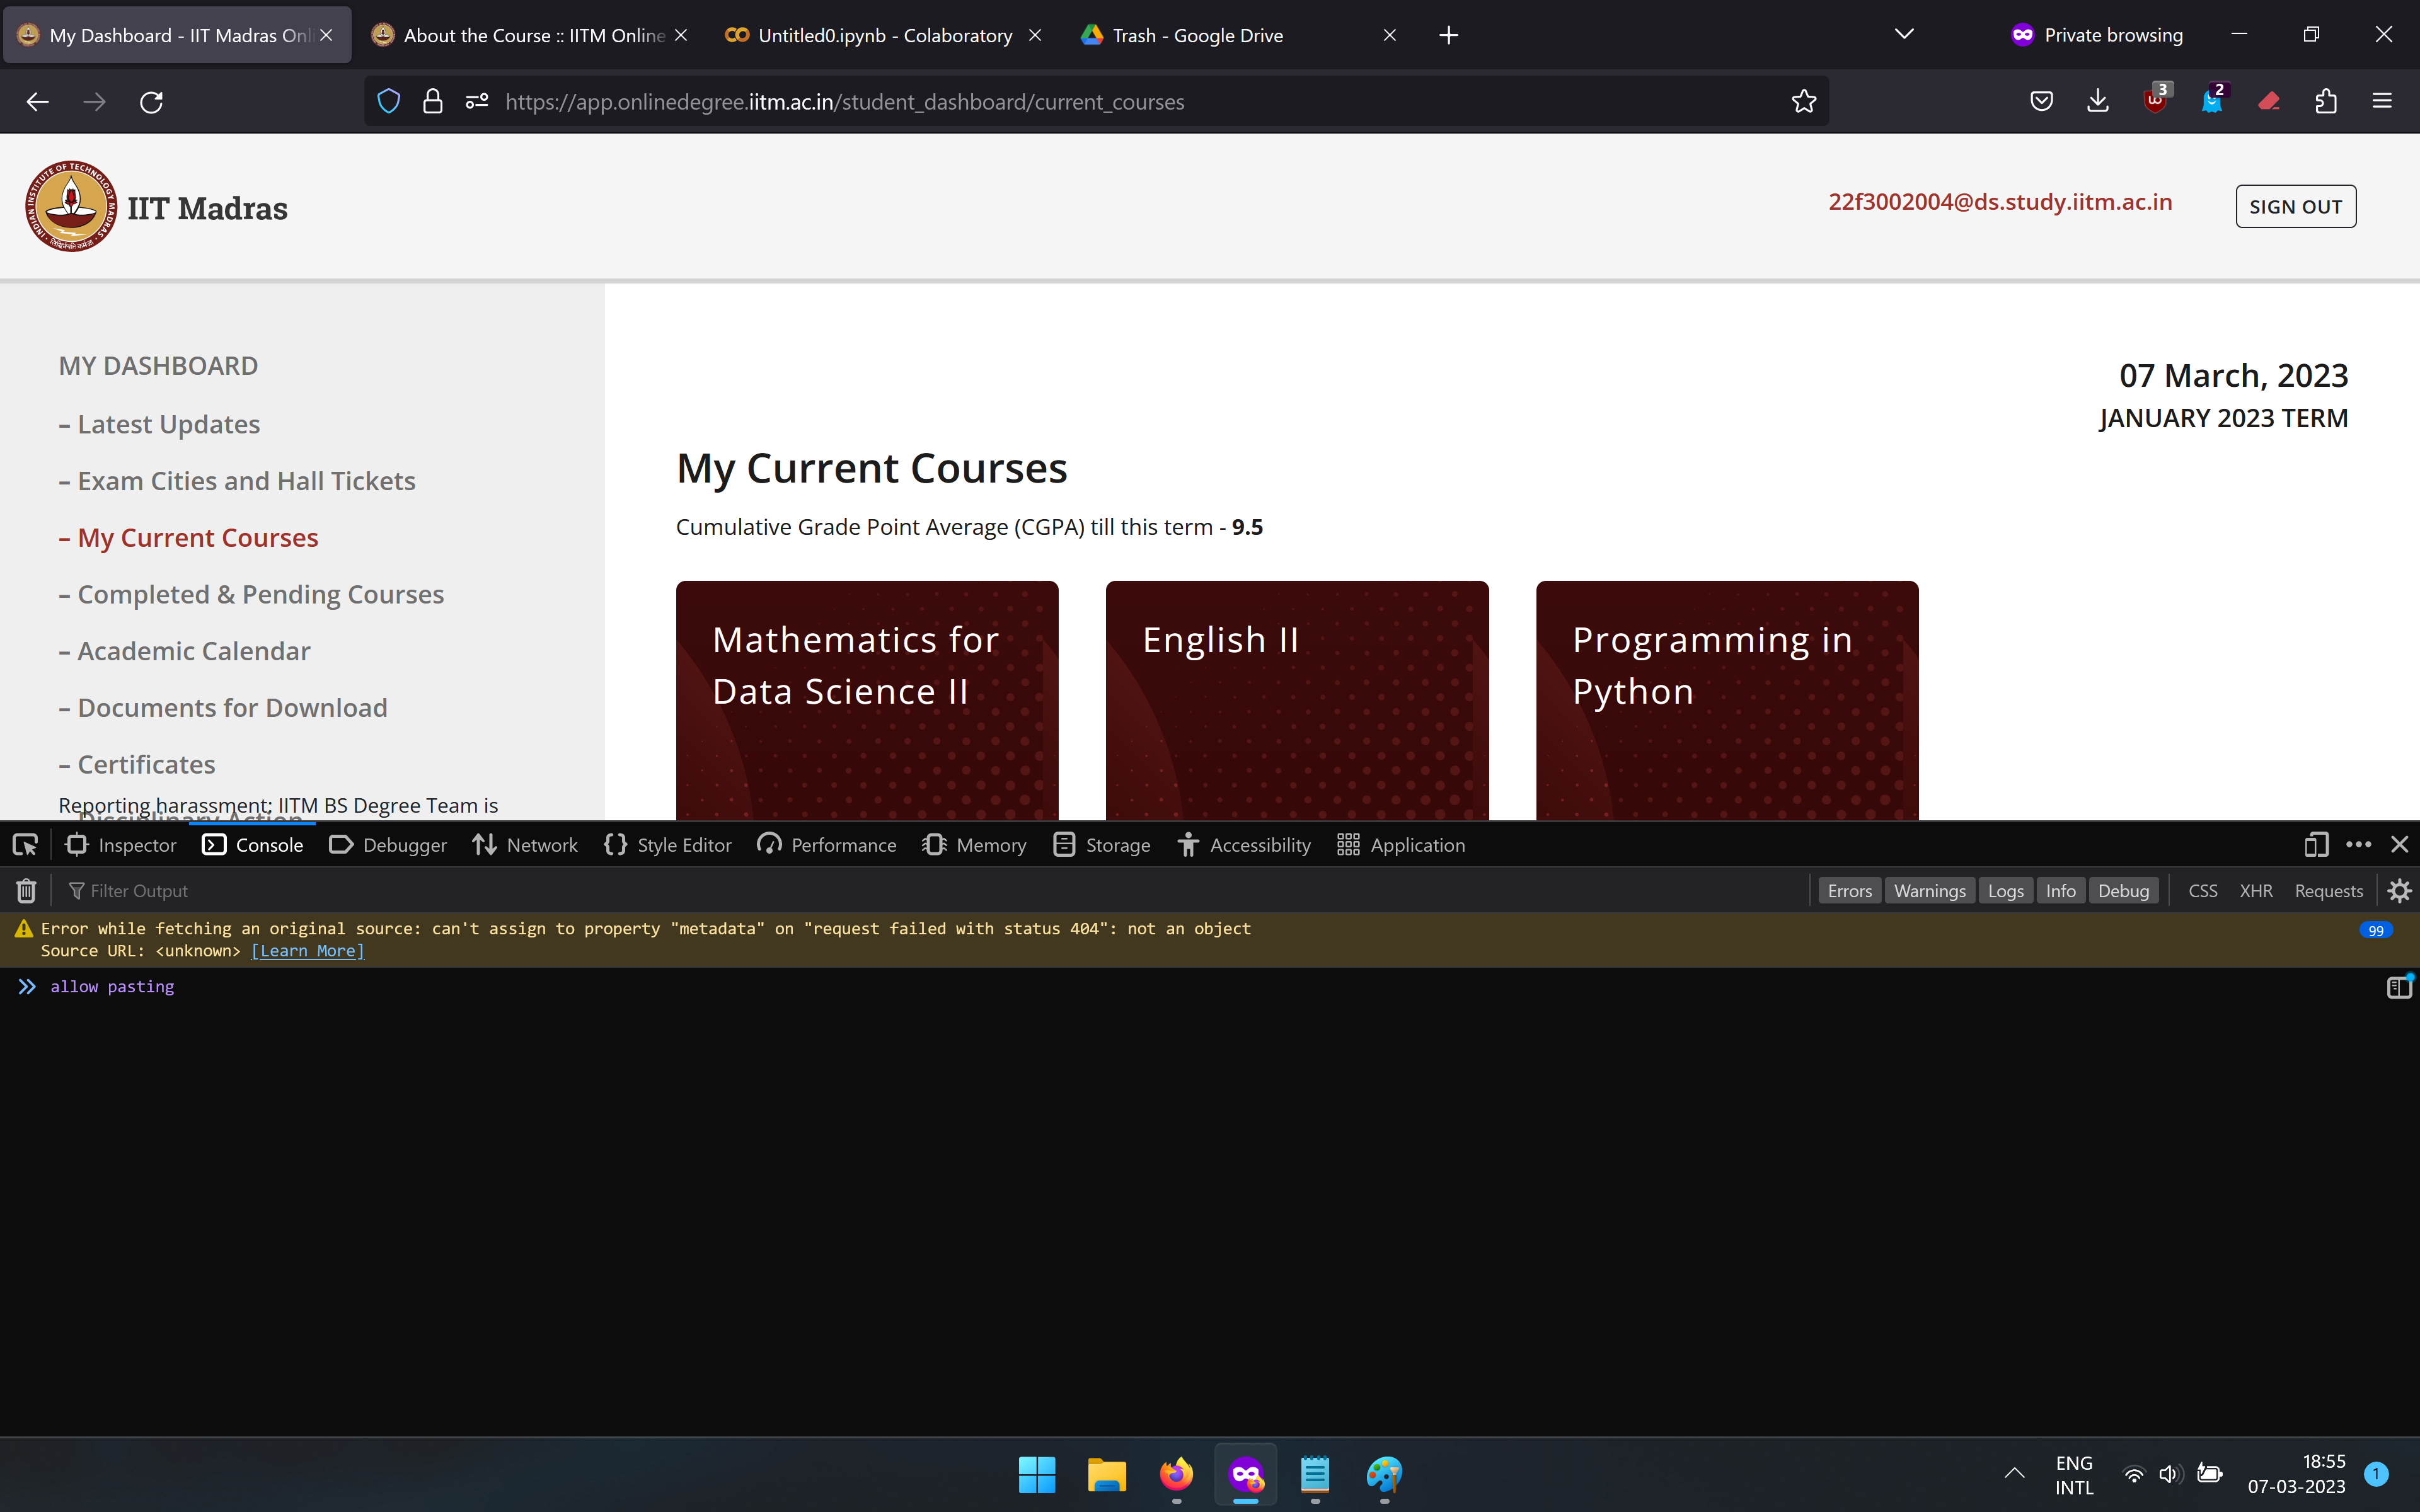

### Google Chrome and similar

- Press F12
- Switch to `console`

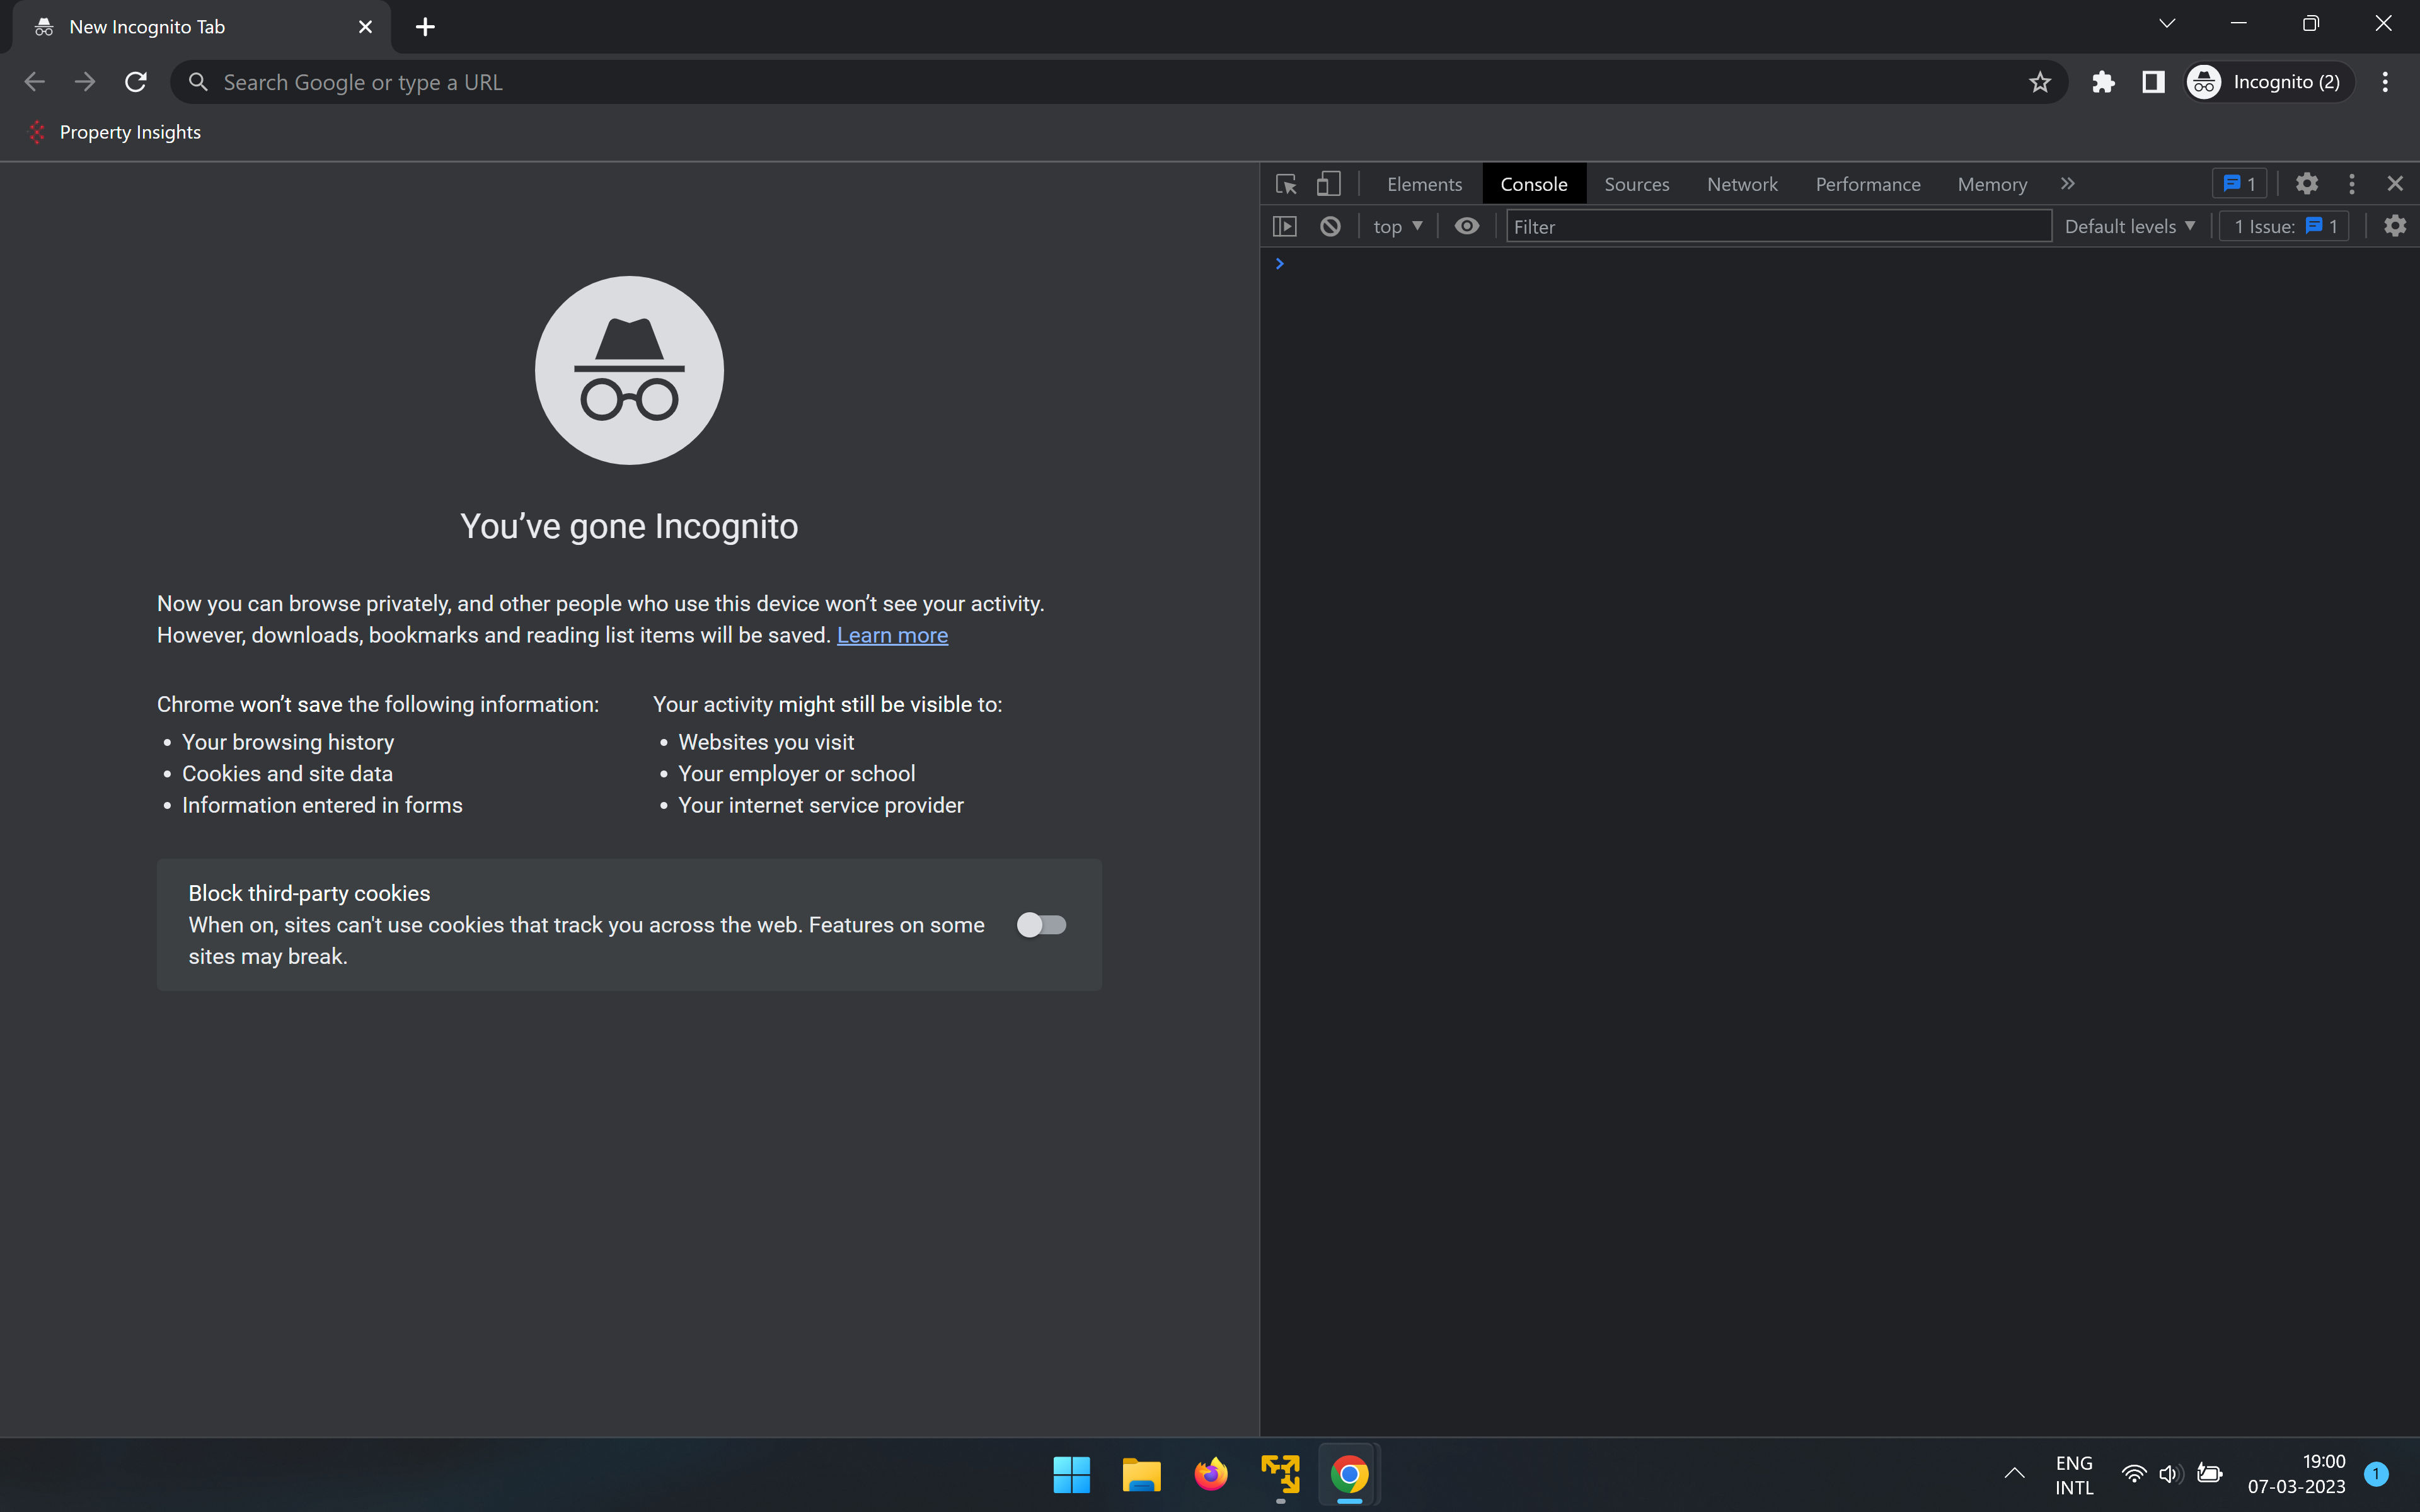

Run the cell below to install dependencies

In [ ]:
!pip install pyjwt requests

## Extracting course links

- Go to Student Dashboard
- Go to `My Courses`
- Open browser console

Paste the following code snippet in the browser console

```javascript
var course_links = [];
for(var i=0; i<document.getElementsByClassName("courses-list")[0].children.length; i++){
  course_links.push(document.getElementsByClassName("courses-list")[0].children[i].lastElementChild.href);
}
alert(JSON.stringify(course_links));
```

Copy the output entire output

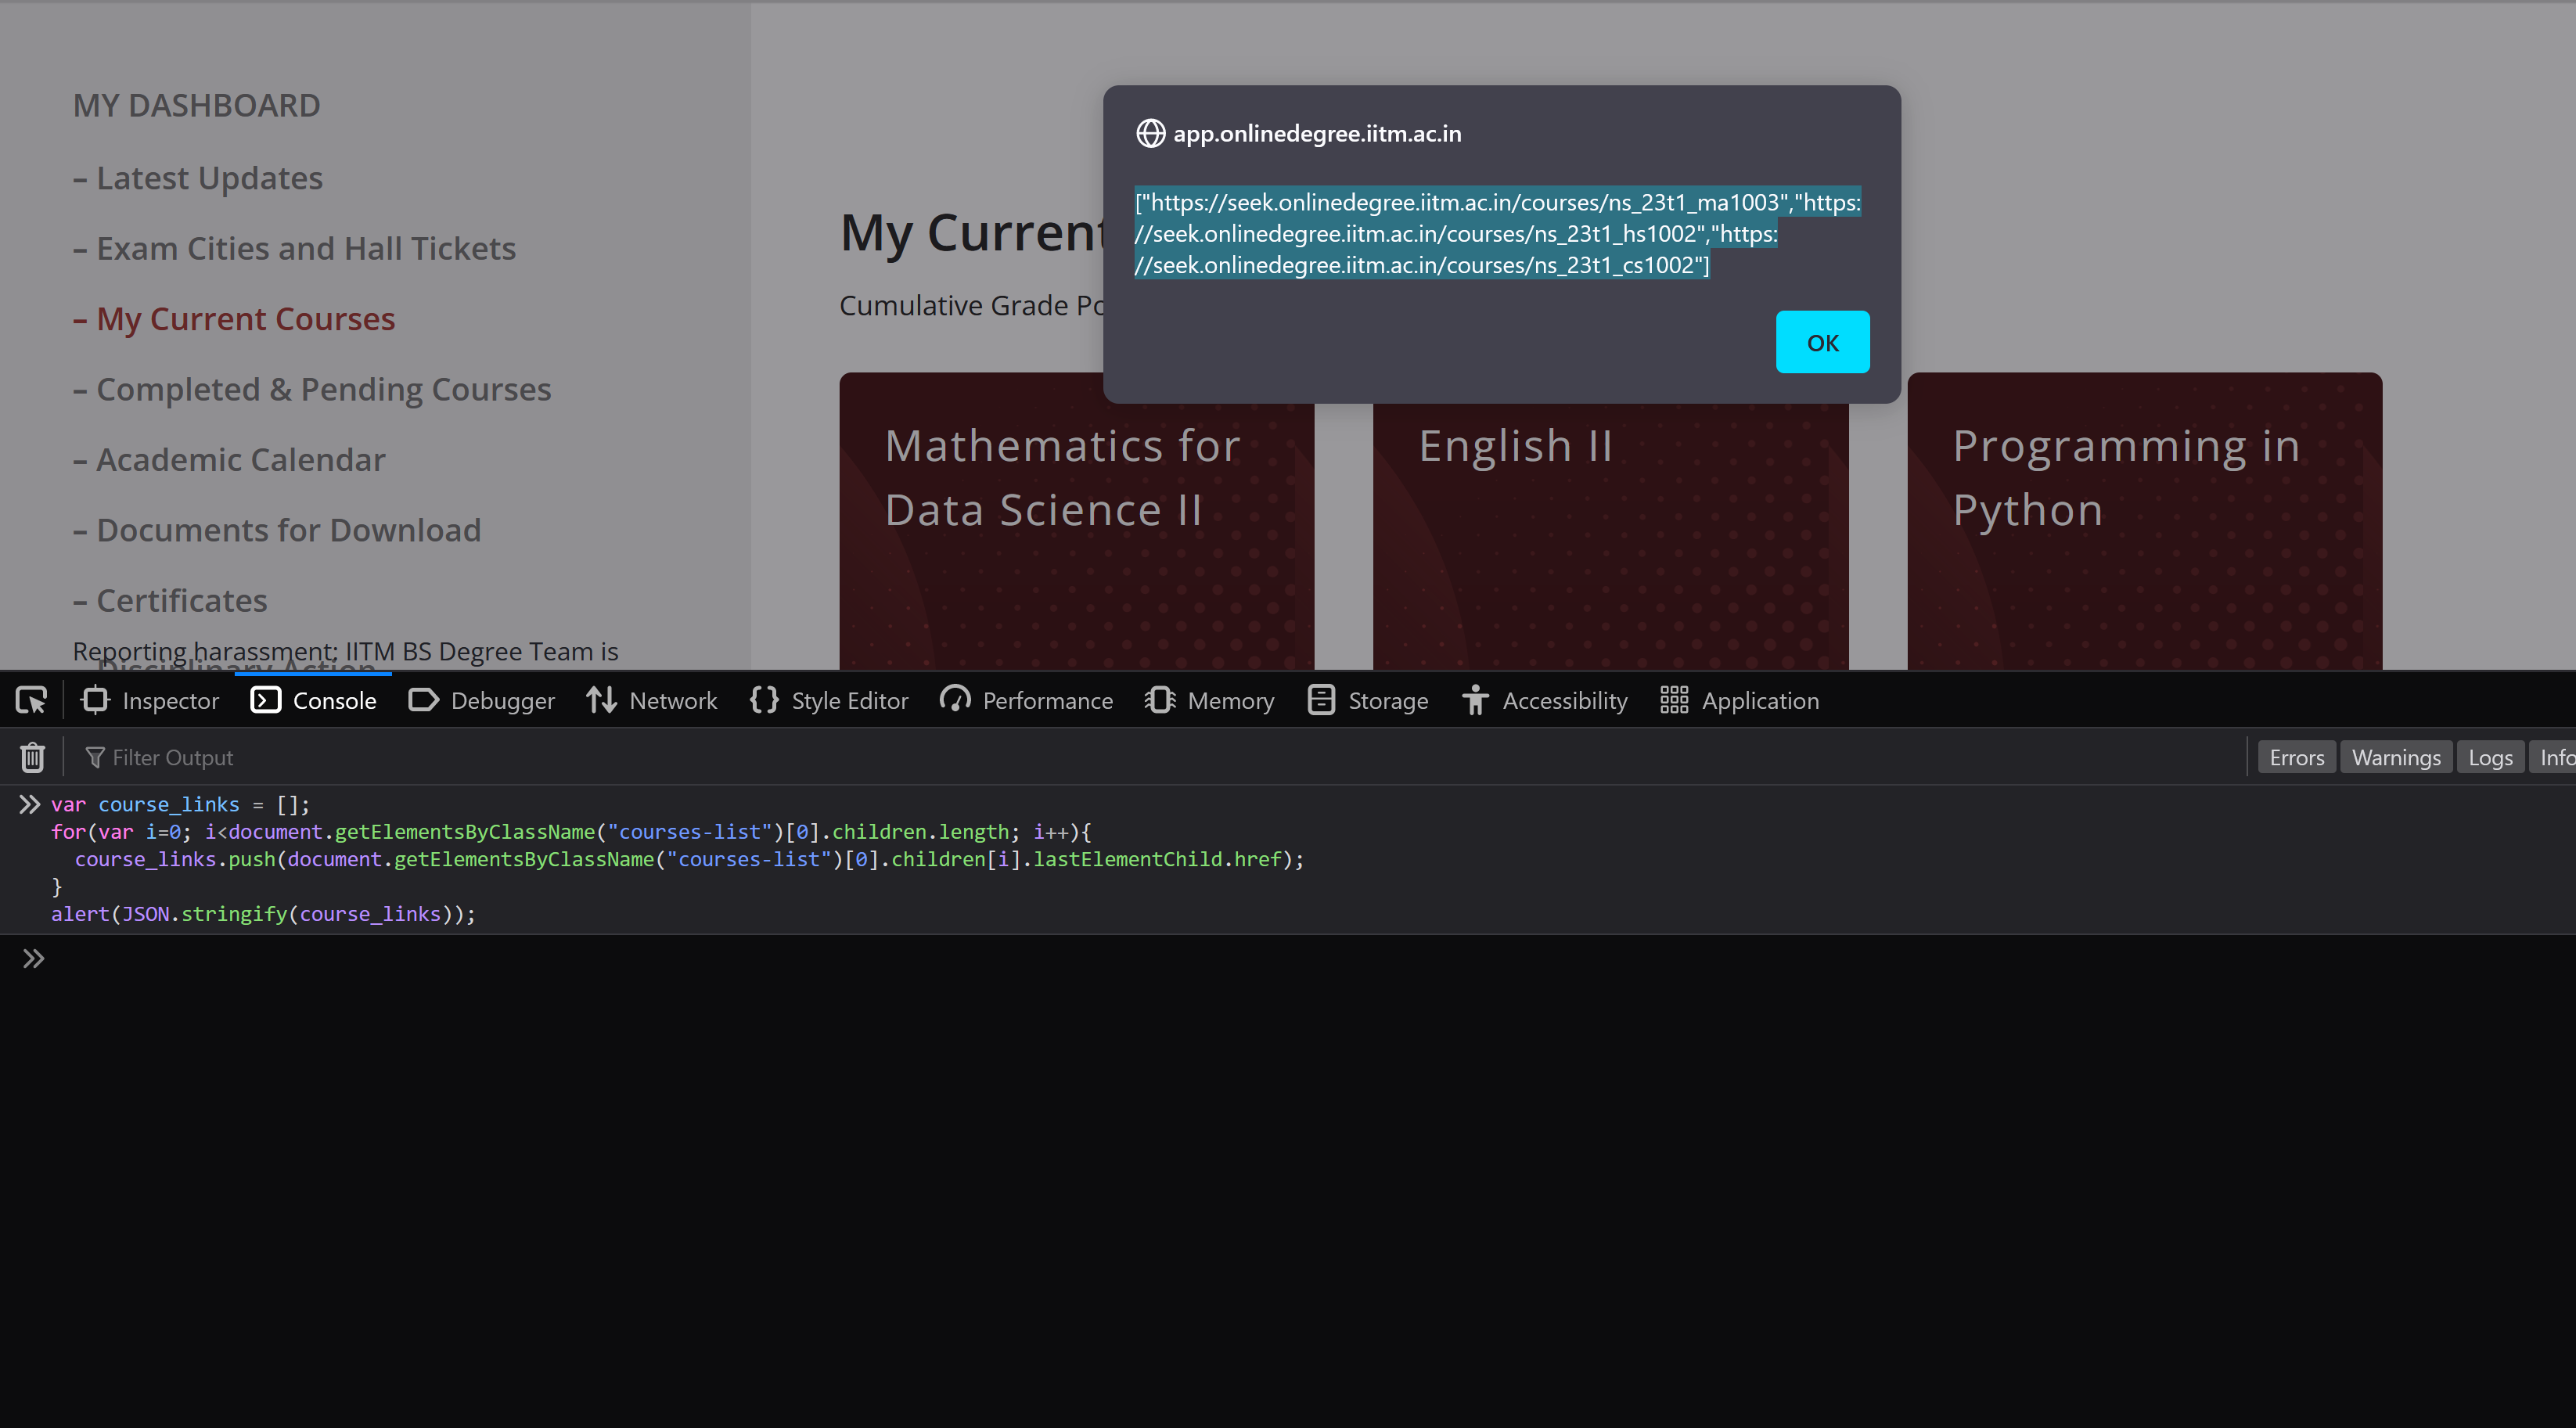

Run the next cell and paste the bit you copied above in the input cell as-is

In [ ]:
import ast
s = input()

course_links = ast.literal_eval(input("Enter course links: "))
try:
  assert isinstance(course_links, list) and len(course_links) > 0
except AssertionError:
  print("Invalid format, did you copy correctly?")

["https://seek.onlinedegree.iitm.ac.in/courses/ns_23t2_ma1003","https://seek.onlinedegree.iitm.ac.in/courses/ns_23t2_ma1004"]
Enter course links: ["https://seek.onlinedegree.iitm.ac.in/courses/ns_23t2_ma1003","https://seek.onlinedegree.iitm.ac.in/courses/ns_23t2_ma1004"]


## ID Token collection

- Open any course
- Open browser console

Paste the following code as-is and copy the output from the pop-up

```javascript
JSON.parse(localStorage.getItem("id_token")).token;
```

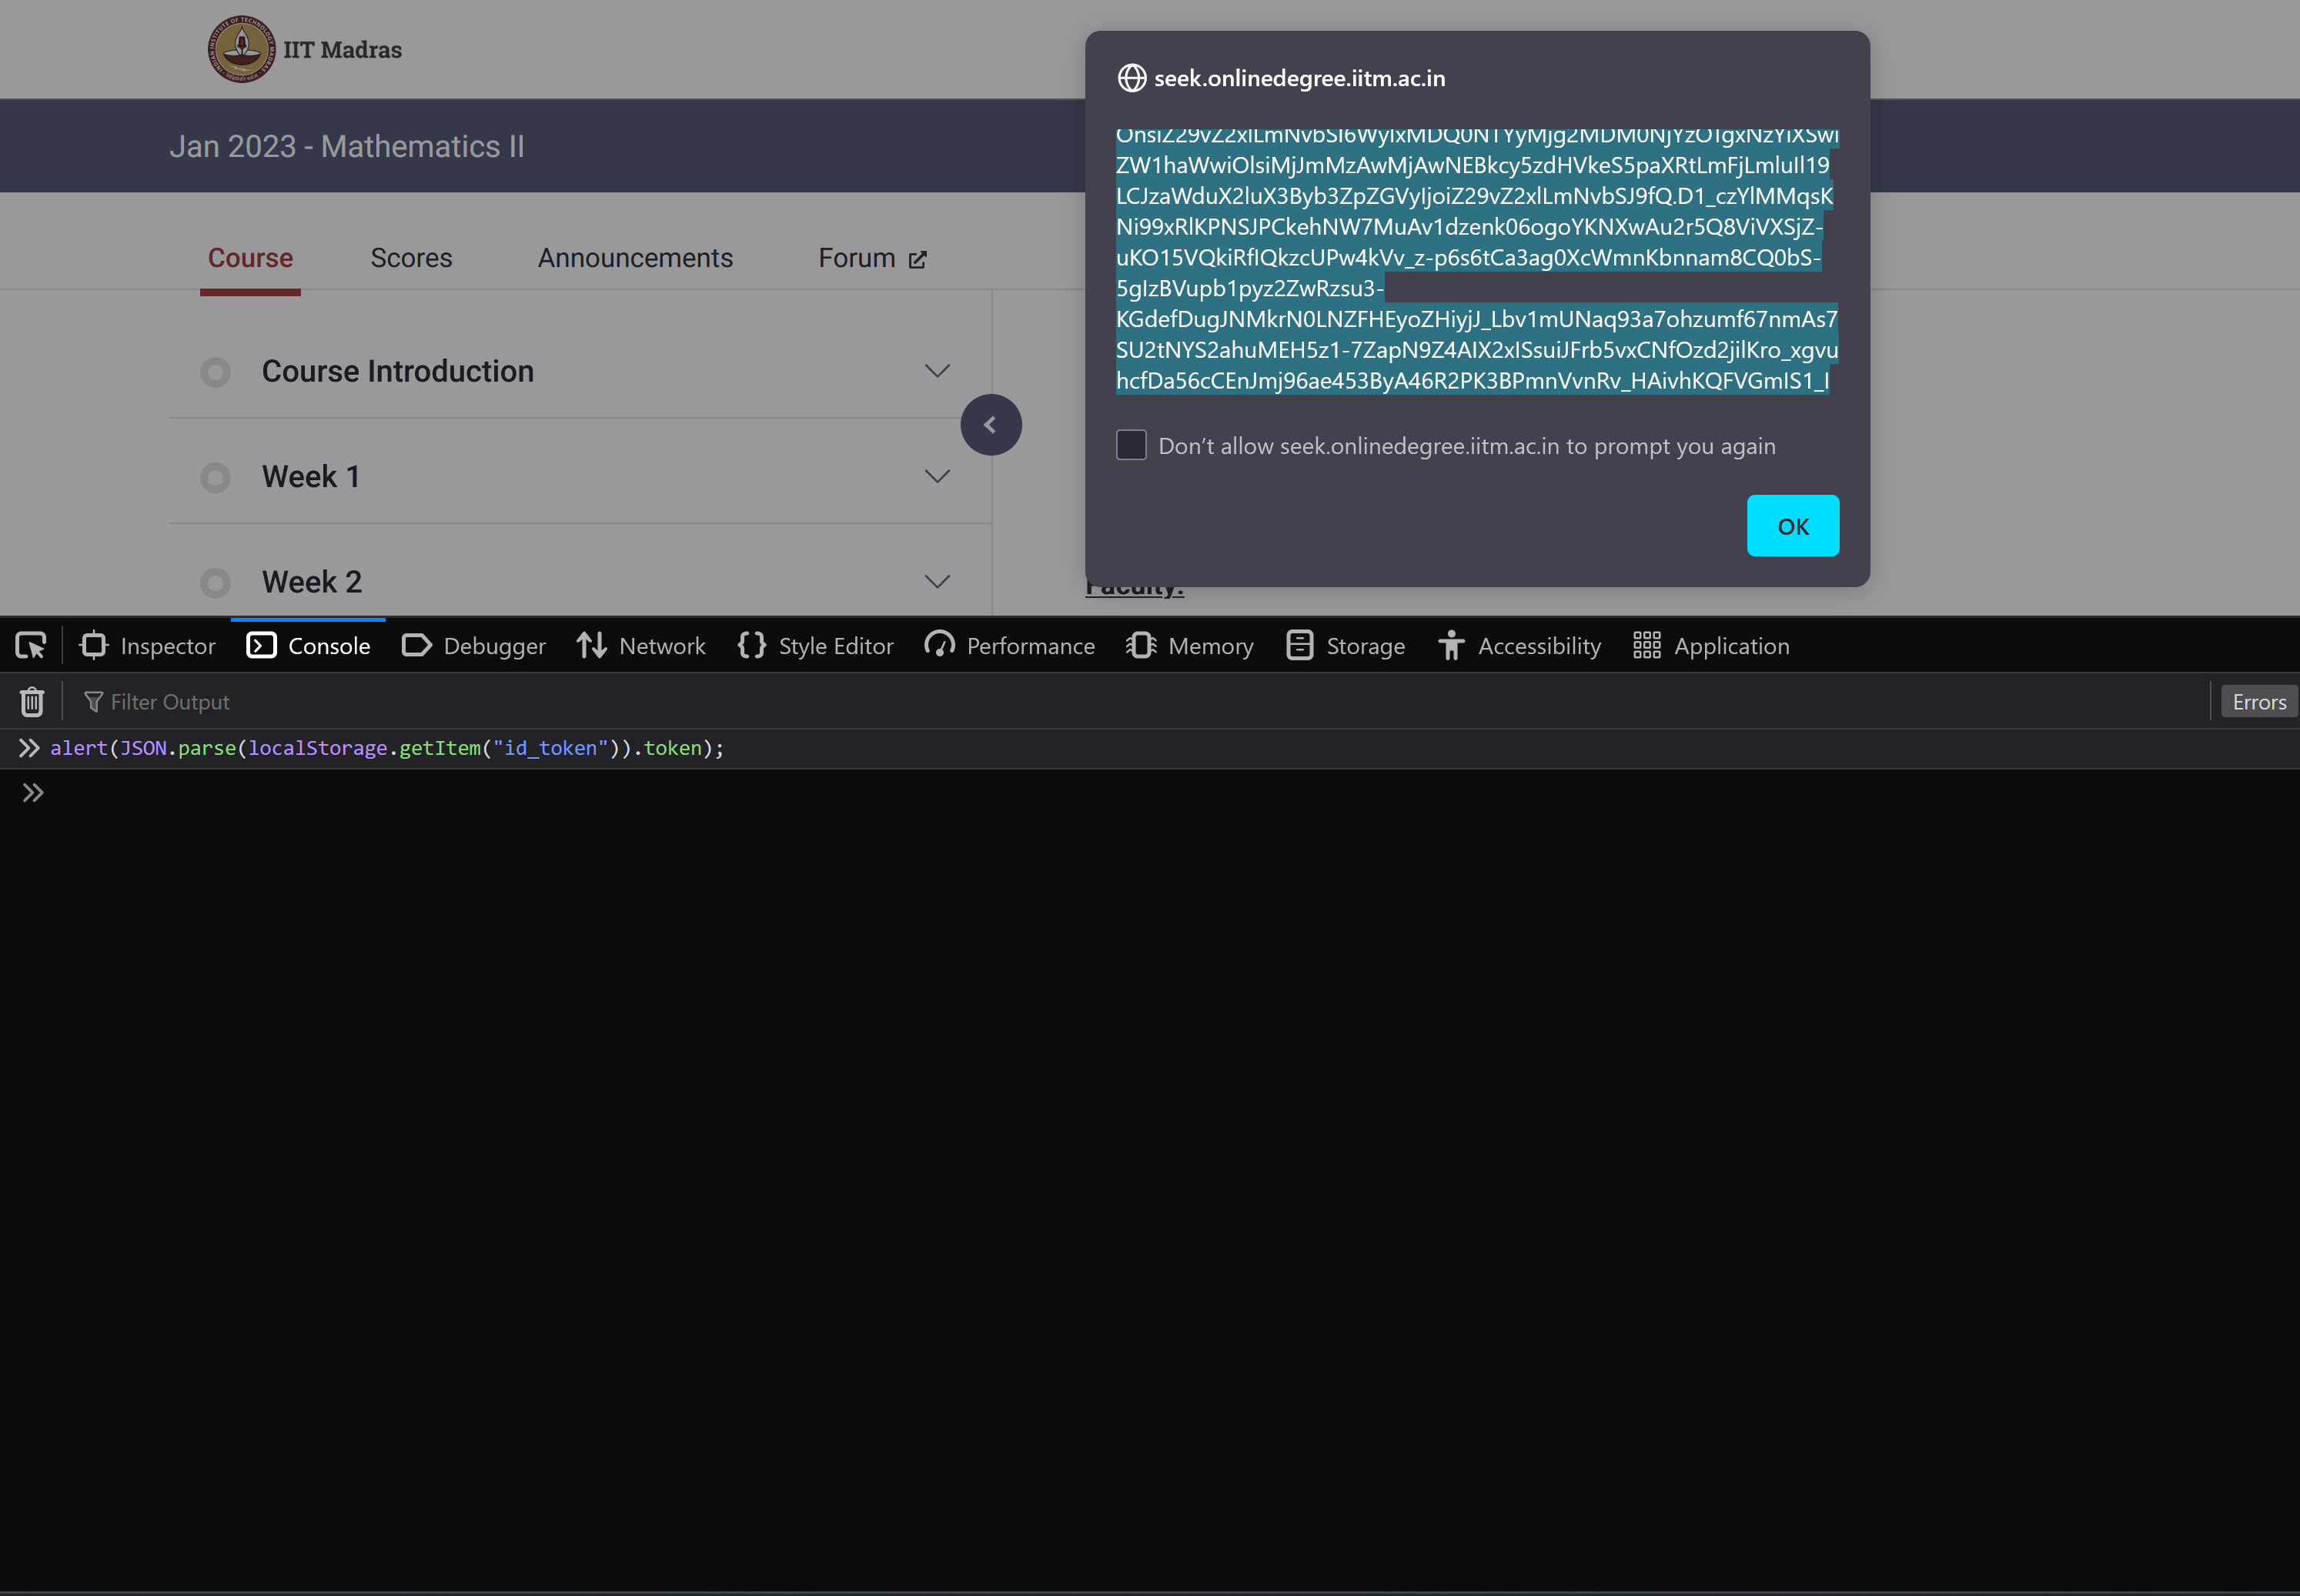

In [ ]:
import json
import jwt
import requests
import time
from urllib.parse import urlparse, urljoin
id_token = ast.literal_eval(input("Enter ID token: "))
decoded_token = jwt.decode(id_token, options={"verify_signature": False})
try:
  assert isinstance(id_token, str)
  assert time.time() < decoded_token["exp"]
except AssertionError:
  print("Your ID token is invalid or expired, please hard-refresh your course page and retry.")

Enter ID token: 'eyJhbGciOiJSUzI1NiIsImtpZCI6IjYzODBlZjEyZjk1ZjkxNmNhZDdhNGNlMzg4ZDJjMmMzYzIzMDJmZGUiLCJ0eXAiOiJKV1QifQ.eyJuYW1lIjoiUmFqbmlzaCBLdW1hciIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BR05teXhhOS1IWTVPdzBIRDA5WWQ2NjA1U1VYTFgxUE1iWlNBVWhQLUw2TUV3PXM5Ni1jIiwiaXNzIjoiaHR0cHM6Ly9zZWN1cmV0b2tlbi5nb29nbGUuY29tL3NlZWstb2RlLXByb2QtYXV0aCIsImF1ZCI6InNlZWstb2RlLXByb2QtYXV0aCIsImF1dGhfdGltZSI6MTY4ODEwOTUwNywidXNlcl9pZCI6Ikx5S2J6enB1em9aSzA2ZmlaWGFsdm51Mlg2MDIiLCJzdWIiOiJMeUtienpwdXpvWkswNmZpWlhhbHZudTJYNjAyIiwiaWF0IjoxNjkyOTQ4Mjk2LCJleHAiOjE2OTI5NTE4OTYsImVtYWlsIjoiMjJmMjAwMDYyNUBkcy5zdHVkeS5paXRtLmFjLmluIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImZpcmViYXNlIjp7ImlkZW50aXRpZXMiOnsiZ29vZ2xlLmNvbSI6WyIxMTYzMTg0MjgzNzkzNDQ0MjI1NjIiXSwiZW1haWwiOlsiMjJmMjAwMDYyNUBkcy5zdHVkeS5paXRtLmFjLmluIl19LCJzaWduX2luX3Byb3ZpZGVyIjoiZ29vZ2xlLmNvbSJ9fQ.PKjtZANk0Is0UaGbnWZ3XWMc00CAl8RKLJS9spY9fej0Nj_3u9oWa5843kzQTKaxRmVfnpFLOavtJq0CCkFzywckzu_XCGbVDEp_cbg5Ny6rmMchfDyEeL_9BthY-Uwno9dQa9FpskZ48Pfvz

In [ ]:
BACKEND_URL = "https://studify.space"
ALE_VERSION = "1.1.0"

for course in course_links:
    content_changed = False
    namespace = urlparse(course).path.split("/")[-1]
    print("*"*20)
    print(namespace)
    stored_content_response = requests.get(urljoin(BACKEND_URL, f"/cache/{namespace}"))
    is_cached = False
    cached_content = stored_content_response.json()
    if stored_content_response.ok:
      is_cached = True

    headers = headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/110.0',
        'Accept': 'application/json, text/plain, */*',
        'Accept-Language': 'en-US,en;q=0.5',
        # 'Accept-Encoding': 'gzip, deflate, br',
        'SEEK_ID_TOKEN': id_token,
        'SEEK_NAMESPACE': namespace,
        'Content-Type': 'application/json',
        'Origin': 'https://seek.onlinedegree.iitm.ac.in',
        'DNT': '1',
        'Connection': 'keep-alive',
        'Referer': 'https://seek.onlinedegree.iitm.ac.in/',
        'Sec-Fetch-Dest': 'empty',
        'Sec-Fetch-Mode': 'cors',
        'Sec-Fetch-Site': 'same-site',
        # Requests doesn't support trailers
        # 'TE': 'trailers',
    }
    payload = {
        "operationName": "course",
        "variables":
        {
            "namespace": namespace
        },
        "query": "query course($namespace: String!) {\n  course(namespace: $namespace) {\n    courseOutlineWithChildrenOrder\n    title\n    forumUrl\n}\n}\n"
    }
    response = requests.post(
        'https://backend.seek.onlinedegree.iitm.ac.in/graphql', headers=headers, json=payload)
    if response.ok:
        response = response.json()
        course_outline = json.loads(
            response["data"]["course"]["courseOutlineWithChildrenOrder"])

        if not is_cached:
            content = {
                "title": response["data"]["course"]["title"],
                "course_id": namespace,
                "forum_url": response["data"]["course"]["forumUrl"],
                "week_wise": []
            }
        else:
            content = {
                "course_id": namespace,
                "week_wise": []
            }

        for i in range(len(course_outline)):
            week_content = {
                "title": course_outline[i]["title"],
                "videos": []
            }

            if week_content['title'] in cached_content:
                print(f"Skipping {week_content['title']}")
                continue

            for item in course_outline[i]["children"]:
                if item["type"] == "lesson" and item["has_video"]:
                    video_payload = {
                        "operationName": "lesson",
                        "variables":
                        {
                            "id_": str(item["id"]),
                            "namespace": namespace
                        },
                        "query": "query lesson($id_: String!, $namespace: String!) {\n  lesson(id_: $id_, namespace: $namespace) {\n    title\n    video\n    transcriptVttUrl\n    objectives\n    lessonId\n}\n}\n"
                    }

                    video_response = requests.post(
                        'https://backend.seek.onlinedegree.iitm.ac.in/graphql', headers=headers, json=video_payload)
                    if video_response.ok:
                        video_response = video_response.json()
                        print(video_response["data"]["lesson"]["title"])
                        # time.sleep(0.2)

                        video = {
                            "title": video_response["data"]["lesson"]["title"],
                            "yt_vid": video_response["data"]["lesson"]["video"],
                            "transcript_vtt_url": video_response["data"]["lesson"]["transcriptVttUrl"]
                        }
                        week_content["videos"].append(video)
                    else:
                        print(video_response.content,
                              video_response.status_code)
                        quit()

            if week_content["videos"]:
                content_changed = True
                content["week_wise"].append(week_content)
    else:
        print("-"*20)
        print(response.content)
        print("-"*20)
        quit()

    if content_changed:
        print(content)
        content['ALE_VERSION'] = ALE_VERSION
        course_response = requests.post(urljoin(BACKEND_URL, "course"), json=content)
        if not course_response.ok:
            print("-"*20)
            print("There was an error sending course content")
            print(course_response.content)
            print("-"*20)
            quit()

********************
ns_23t2_ma1003
L1.1: Vectors
L1.2: Matrices
L1.3: Systems of Linear Equations
L1.4: Determinants (part 1)
L1.5: Determinants (part 2)
Week 01 - Tutorial 01
Week 01 - Tutorial 02
Week 01 - Tutorial 03
Week 01 - Tutorial 04
Week 01 - Tutorial 05
Week 01 - Tutorial 06
Week 01 - Tutorial 07
Week 01 - Tutorial 08
L2.1 Determinants (part 3)
L2.2 Cramer's Rule
L2.3 Solutions to a system of linear equations with an invertible coefficient matrix
L2.4 The echelon form
L2.5 Row reduction
L2.6 The Gaussian elimination method
Week 02 - Tutorial 01
Week 02 - Tutorial 02
Week 02 - Tutorial 03
Week 02 - Tutorial 04
Week 02 - Tutorial 05
Week 02 - Tutorial 06
Week 02 - Tutorial 07
Week 02 - Tutorial 08
L3.1 Introduction to vector spaces
L3.2 Some properties of vector spaces
L3.3 Linear dependence
L3.4 Linear independence - Part 1
L3.5 Linear independence - Part 2
Week 03 - Tutorial 01
Week 03 - Tutorial 02
Week 03 - Tutorial 03
Week 03 - Tutorial 04
Week 03 - Tutorial 05
Week 03 - 